In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the data
INPUT_DATA_PATH = '/kaggle/input/playground-series-s5e7/'
train = pd.read_csv(INPUT_DATA_PATH + 'train.csv')
test = pd.read_csv(INPUT_DATA_PATH + 'test.csv')

print(f"Dataset Shape: {train.shape}")
print("\nData Info:")
train.info()

print("\nFirst 5 Rows of the Dataset:")
display(train.head(5))

# Drop ID column from train
train = train.drop(columns='id')
train.head()

Dataset Shape: (18524, 9)

Data Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB

First 5 Rows of the Dataset:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [2]:
# Check for missing values
print("\nMissing values in train:")
print(train.isnull().sum())

# Check for Feature types and unique values in each column
numerical_features = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(exclude=['number']).columns

pd.concat([
    pd.DataFrame(train.dtypes, columns=['dtypes']),
    pd.DataFrame(train.nunique(), columns=['n_unique'])
], axis=1).iloc[1:]


Missing values in train:


Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


,dtypes,n_unique
Stage_fear,object,2
Social_event_attendance,float64,11
Going_outside,float64,8
Drained_after_socializing,object,2
Friends_circle_size,float64,16
Post_frequency,float64,11
Personality,object,2


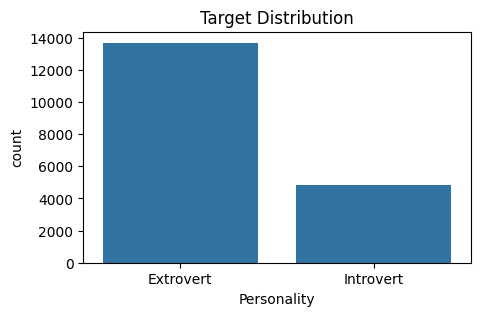


Summary statistics:


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [3]:
# Target distribution
plt.figure(figsize=(5,3))
sns.countplot(data=train, x='Personality')
plt.title("Target Distribution")
plt.show()

# Summary statistics for numerical features
print("\nSummary statistics:")
display(train.describe())

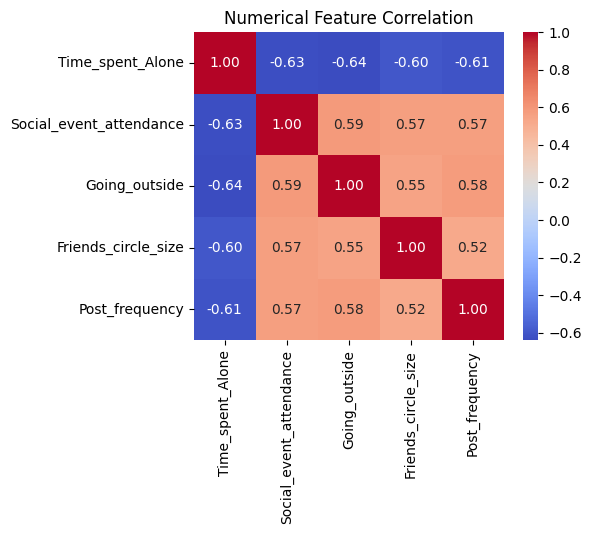

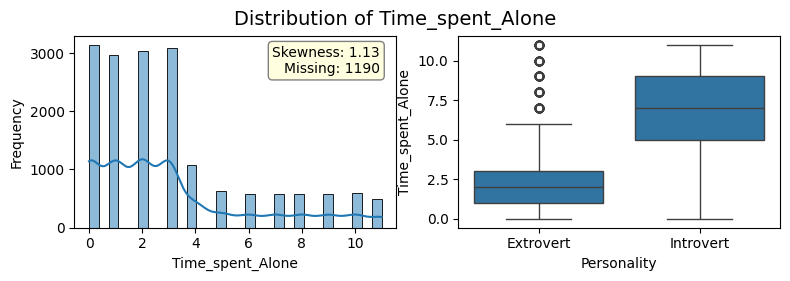

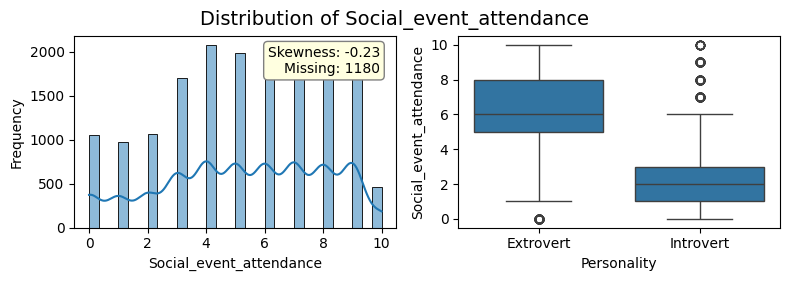

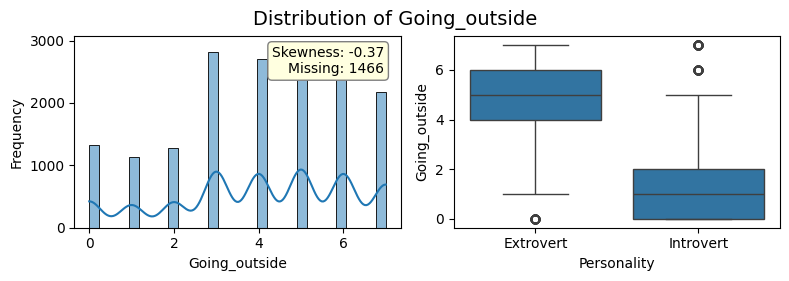

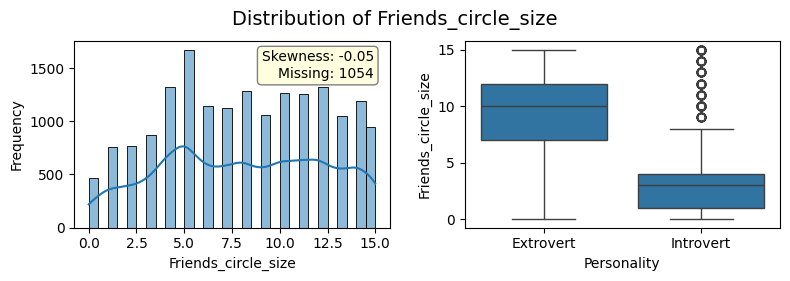

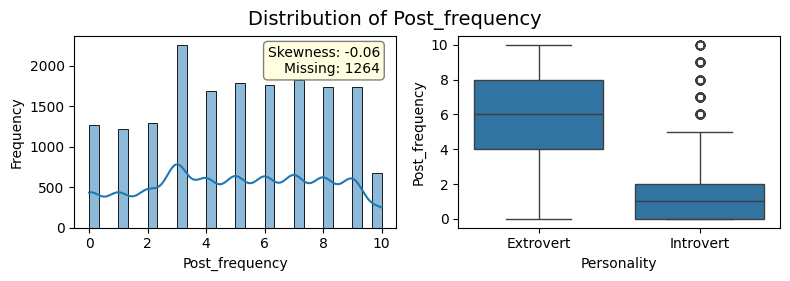

In [4]:
# Feature correlation (numerical features only)
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(5,4))
sns.heatmap(train[numerical_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Numerical Feature Correlation")
plt.show()

for feature in numerical_features:
    plt.figure(figsize=(8, 3))
    plt.suptitle(f"Distribution of {feature}", fontsize=14, y=0.92)

    plt.subplot(1, 2, 1)
    sns.histplot(train[feature], kde=True, bins=30)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    skew_val = train[feature].skew()
    missing_val = train[feature].isnull().sum()
    plt.text(
        0.95, 0.95,
        f"Skewness: {skew_val:.2f}\nMissing: {missing_val}",
        ha='right', va='top',
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray')
    )

    plt.subplot(1, 2, 2)
    sns.boxplot(x=train['Personality'], y=train[feature])
    plt.tight_layout()
    plt.show()

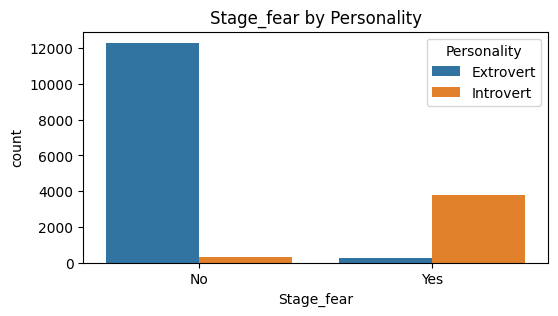

,Stage_fear,count
0,No,12609
1,Yes,4022


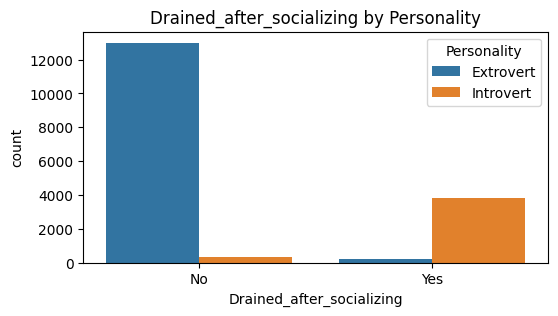

,Drained_after_socializing,count
0,No,13313
1,Yes,4062


In [5]:
# Check categorical/object features (if any)
cat_features = train.select_dtypes(include=['object']).columns.tolist()
cat_features = [f for f in cat_features if f not in ['Personality']]

if cat_features:
    for col in cat_features:
        plt.figure(figsize=(6,3))
        sns.countplot(data=train, x=col, hue='Personality')
        plt.title(f"{col} by Personality")
        plt.show()
        display(pd.DataFrame(train[col].value_counts()).reset_index())

In [6]:
# Identify numeric and non-numeric features
num_features = train.select_dtypes(include=[np.number]).columns.tolist()
num_features = [col for col in num_features if col not in ['id']]

cat_features = [col for col in train.columns if col not in num_features + ['id', 'Personality']]

# Fill numeric features with median
for col in num_features:
    median_value = train[col].median()
    train[col] = train[col].fillna(median_value)
    test[col] = test[col].fillna(median_value)

In [7]:
!pip install xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb

print("\n=== DATA PREPROCESSING ===")

# Separate features and target
X_train = train.drop(['id', 'Personality'], axis=1, errors='ignore')
y_train = train['Personality'] if 'Personality' in train.columns else None
X_test = test.drop(['id'], axis=1, errors='ignore')

print(f"Features shape: {X_train.shape}")
print(f"Target shape: {y_train.shape if y_train is not None else 'None'}")

# Encode categorical variables
label_encoders = {}
categorical_columns = X_train.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded {col}: {le.classes_}")

# Encode target variable
if y_train is not None:
    target_encoder = LabelEncoder()
    y_train_encoded = target_encoder.fit_transform(y_train)
    print(f"Target classes: {target_encoder.classes_}")
else:
    y_train_encoded = np.random.choice([0, 1], X_train.shape[0])  # For demo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/253.9 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/253.9 MB 21.4 MB/s eta 0:00:12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/253.9 MB 27.1 MB/s eta 0:00:10

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/253.9 MB 33.5 MB/s eta 0:00:08

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/253.9 MB 63.3 MB/s eta 0:00:04

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/253.9 MB 123.6 MB/s eta 0:00:02

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/253.9 MB 173.9 MB/s eta 0:00:02

     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/253.9 MB 173.7 MB/s eta 0:00:02

     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/253.9 MB 175.2 MB/s eta 0:00:02

     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/253.9 MB 173.8 MB/s eta 0:00:02

     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/253.9 MB 175.6 MB/s eta 0:00:02

     ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/253.9 MB 175.0 MB/s eta 0:00:02

     ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/253.9 MB 176.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/253.9 MB 176.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 100.7/253.9 MB 175.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 106.7/253.9 MB 175.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 118.9/253.9 MB 176.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 124.7/253.9 MB 172.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 136.8/253.9 MB 177.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 142.9/253.9 MB 175.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 155.1/253.9 MB 177.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 161.0/253.9 MB 174.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 167.1/253.9 MB 175.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 179.2/253.9 MB 175.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 185.2/253.9 MB 175.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 197.2/253.9 MB 174.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 203.2/253.9 MB 175.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 215.3/253.9 MB 175.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 221.4/253.9 MB 176.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 233.4/253.9 MB 174.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 239.5/253.9 MB 176.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 251.5/253.9 MB 174.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 253.9/253.9 MB 171.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip



=== DATA PREPROCESSING ===


Features shape: (18524, 7)
Target shape: (18524,)
Encoded Stage_fear: ['No' 'Yes' 'nan']
Encoded Drained_after_socializing: ['No' 'Yes' 'nan']
Target classes: ['Extrovert' 'Introvert']


In [8]:
!pip install --upgrade xgboost


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Define parameters (put eval_metric here)
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',  # <- keep it here
    'max_leaves': 30,
    'n_estimators': 10000,
    'random_state': 42,
    'tree_method': 'hist',
    'device': "cuda"
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

print(f"Performing {n_splits}-fold Stratified Cross Validation...")

cv_scores = []
fold_num = 1

for train_idx, val_idx in skf.split(X_train, y_train_encoded):
    print(f"\nTraining Fold {fold_num}/{n_splits}...")

    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_encoded[train_idx], y_train_encoded[val_idx]

    fold_model = xgb.XGBClassifier(**xgb_params)

    # Fit without eval_metric in fit() for older versions
    fold_model.fit(
        X_fold_train, y_fold_train,
        eval_set=[(X_fold_val, y_fold_val)],
        verbose=False
    )

    fold_predictions = fold_model.predict(X_fold_val)
    fold_accuracy = accuracy_score(y_fold_val, fold_predictions)
    cv_scores.append(fold_accuracy)

    print(f"Fold {fold_num} Accuracy: {fold_accuracy:.4f}")
    fold_num += 1

cv_scores = np.array(cv_scores)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Performing 5-fold Stratified Cross Validation...



Training Fold 1/5...


Fold 1 Accuracy: 0.9498



Training Fold 2/5...


Fold 2 Accuracy: 0.9447



Training Fold 3/5...

Fold 3 Accuracy: 0.9479



Training Fold 4/5...


Fold 4 Accuracy: 0.9528


Training Fold 5/5...

Fold 5 Accuracy: 0.9479

Cross-validation scores: [0.94979757 0.94466937 0.94790823 0.95276653 0.94789417]
Mean CV Score: 0.9486 (+/- 0.0053)


In [10]:
best_iterations = []
fold_num = 1

print("Extracting best iterations from each CV fold...")

for train_idx, val_idx in skf.split(X_train, y_train_encoded):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train_encoded[train_idx], y_train_encoded[val_idx]
    
    temp_model = xgb.XGBClassifier(**xgb_params)
    
    # Fit the model WITHOUT early stopping
    temp_model.fit(
        X_fold_train, y_fold_train,
        eval_set=[(X_fold_val, y_fold_val)],
        verbose=False
    )
    
    # Use total number of boosting rounds used (approximate)
    best_iteration = xgb_params["n_estimators"]  # fallback since no early stopping
    best_iterations.append(best_iteration)
    
    print(f"Fold {fold_num} assumed best iteration: {best_iteration}")
    fold_num += 1

# Use average of best_iterations (though all are likely same due to no early stopping)
optimal_n_estimators = int(np.mean(best_iterations))
print(f"\nOptimal n_estimators (average): {optimal_n_estimators}")
print(f"Range: {min(best_iterations)} - {max(best_iterations)}")

# Final model with adjusted estimator count
print(f"\nTraining final model on full dataset with {optimal_n_estimators} estimators...")
xgb_params_final = xgb_params.copy()
xgb_params_final['n_estimators'] = optimal_n_estimators

xgb_model_final = xgb.XGBClassifier(**xgb_params_final)
xgb_model_final.fit(X_train, y_train_encoded)

print("✅ Final model trained on 100% of training data!")

# Feature importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model_final.feature_importances_
}).sort_values('importance', ascending=False)

print("🔝 Top Important Features:")
display(feature_importance.head(10))

Extracting best iterations from each CV fold...


Fold 1 assumed best iteration: 10000


Fold 2 assumed best iteration: 10000


Fold 3 assumed best iteration: 10000


Fold 4 assumed best iteration: 10000


Fold 5 assumed best iteration: 10000

Optimal n_estimators (average): 10000
Range: 10000 - 10000

Training final model on full dataset with 10000 estimators...


✅ Final model trained on 100% of training data!


🔝 Top Important Features:


,feature,importance
4,Drained_after_socializing,0.880621
1,Stage_fear,0.092694
0,Time_spent_Alone,0.006229
2,Social_event_attendance,0.005460
5,Friends_circle_size,0.005210
3,Going_outside,0.005086
6,Post_frequency,0.004700


In [11]:
test_predictions = xgb_model_final.predict(X_test)
test_pred_proba = xgb_model_final.predict_proba(X_test)

test_pred_labels = target_encoder.inverse_transform(test_predictions)

print("\n=== CREATING SUBMISSION FILE ===")
submission_df = pd.DataFrame({
    'id': test['id'],
    'Personality': test_pred_labels
})
submission_df.to_csv('submission_xgb.csv', index=False)
print("Submission file saved as 'submission_xgb.csv'")


=== CREATING SUBMISSION FILE ===


Submission file saved as 'submission_xgb.csv'


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical features using LabelEncoder
for col in cat_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# Encode target variable
target_col = 'Personality'
id_col = 'id'
le_target = LabelEncoder()
train[target_col] = le_target.fit_transform(train[target_col])  # Extrovert/Introvert to 1/0

# Features for modeling
features = [col for col in train.columns if col not in [id_col, target_col]]

X = train[features].values
y = train[target_col].values
X_test = test[features].values

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
test_preds = np.zeros((test.shape[0], 5))
val_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"\nTraining fold {fold+1}/5...")
    X_tr, X_val = X[train_idx], X[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]


Training fold 1/5...



Training fold 2/5...



Training fold 3/5...



Training fold 4/5...



Training fold 5/5...


In [13]:
from scipy.stats import mode

# Majority voting (row-wise mode over the 5 folds)
test_preds_majority = mode(test_preds, axis=1, keepdims=False)[0].astype(int)

In [14]:
test_preds_labels = le_target.inverse_transform(test_preds_majority)

In [15]:
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': test_preds_labels
})
submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved as 'submission.csv'")

✅ Submission file saved as 'submission.csv'
